In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
R = 1.
bubbles = Bubbles([Bubble(Point3(0., 0., 0.), R)])

Bubbles(Bubble[Bubble(Point(0.0, 0.0, 0.0), 1.0)])

# Setting up the Ks

In [3]:
k_0 = 2π / R
ks = LinRange(k_0 / 10, k_0 * 10, 1000)
k_vecs = (x -> Point3(0., 0., x)).(ks)
norm(p:: Point3) = norm(coordinates(p), 2)


norm (generic function with 23 methods)

# Computing Analytically

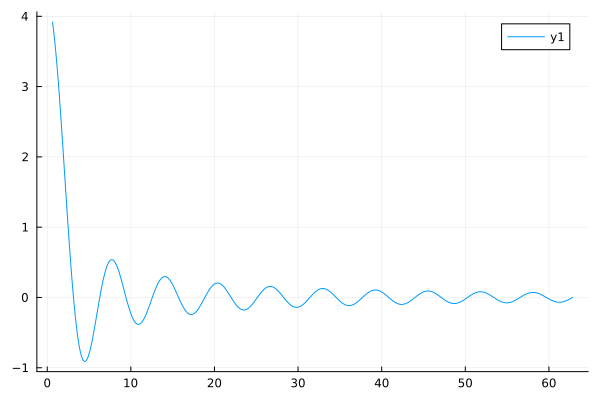

In [4]:
ΔV = 1.
analytic_T_ii = @. ((ΔV * 4π / 3) * (R ^ 3)) * sin(ks * R) / (ks * R)  
plot(ks, analytic_T_ii)

# Computing Numerically

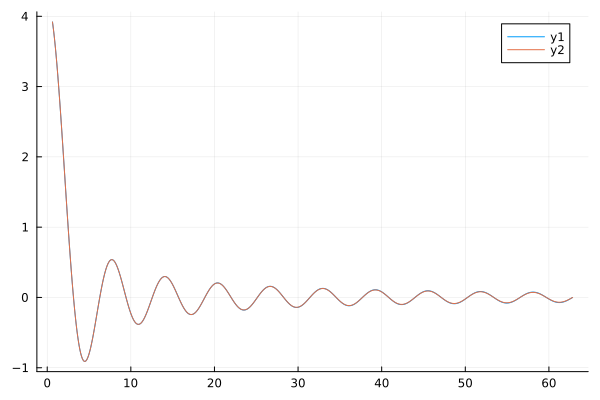

In [5]:
tensor_directions = [:trace, (:x, :x), (:y, :y), (:z, :z), (:x, :y), (:x, :z), (:y, :z)]
surface_integral = EnvelopeApproximation.StressEnergyTensor.surface_integral
numerical_T_ii = surface_integral(k_vecs, bubbles, tensor_directions, 100, 100, ΔV)
plot(ks, [numerical_T_ii[:, 1] .|> real, analytic_T_ii])

# Study Degree of Realness 

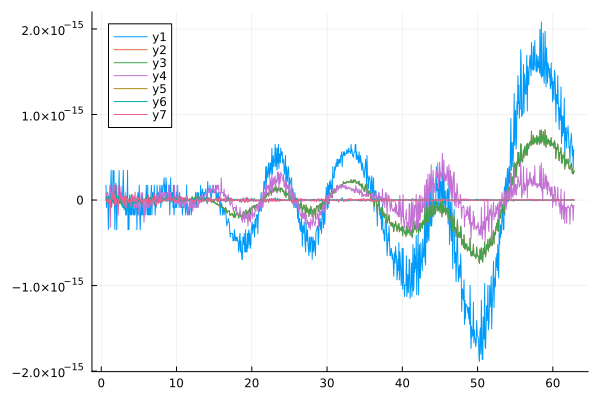

In [6]:
plot(ks, numerical_T_ii .|> imag)

# Study tensor directions

In [7]:
ks

1000-element LinRange{Float64, Int64}:
 0.628319, 0.690584, 0.75285, 0.815116, …, 62.6451, 62.7073, 62.7696, 62.8319

In [26]:
analytical_T_xx = @. 4π / 3 * ΔV  / (ks ^ 3) * (sin(ks * R) - (ks * R) * cos(ks * R))

1000-element Vector{Float64}:
  1.3419126682891864
  1.3307988644124382
  1.3187107445710526
  1.305668165786093
  1.2916925086708098
  1.2768066317805071
  1.2610348228777661
  1.2444027472323822
  1.226937393082527
  1.2086670143904128
  ⋮
 -0.0009553154458466866
 -0.000982598282162563
 -0.0010059716877446616
 -0.0010253609118840107
 -0.0010407068806707184
 -0.0010519663625308405
 -0.0010591120720785387
 -0.0010621327121277536
 -0.001061032953945969

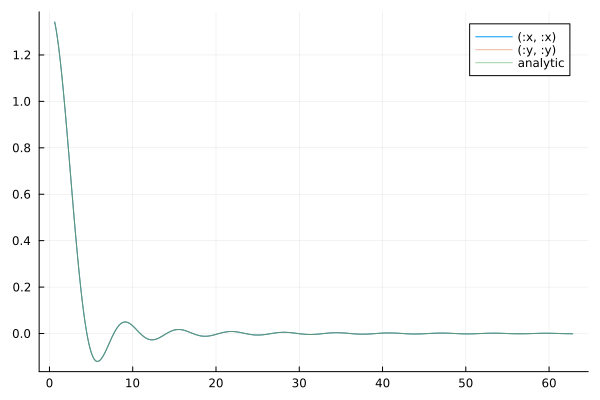

In [27]:
plot(ks, numerical_T_ii[:, 2] .|> real, label="(:x, :x)")
plot!(ks, numerical_T_ii[:, 3] .|> real, label="(:y, :y)", alpha=0.5)
plot!(ks, analytical_T_xx .|> real, label="analytic", alpha = 0.5)

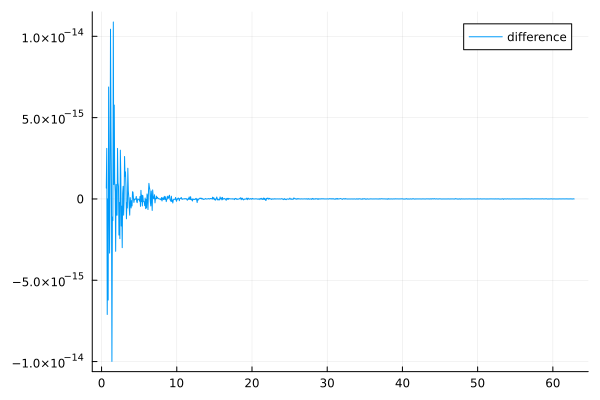

In [28]:
plot(ks, (numerical_T_ii[:, 2] .|> real) - (numerical_T_ii[:, 3] .|> real), label="difference")


## Z, Z

In [30]:
analytic_zz_integral = @.(4π / 3 * ΔV * (1 / (ks ^ 3)) * (2 * ks * R * cos(ks * R) + (R^2 * ks^2 - 2) * sin(ks * R)))

1000-element Vector{Float64}:
  1.2347430120381158
  1.2020983779769918
  1.1667426805257695
  1.128773249287655
  1.0882944979164086
  1.04541761070303
  1.0002602090882504
  0.9529459991547199
  0.9036044012122109
  0.8523701626449691
  ⋮
 -0.030195938462542416
 -0.02637746131535333
 -0.022464567333788533
 -0.018472571477184396
 -0.014417063942672973
 -0.010313849410079502
 -0.006178885578864072
 -0.002028221235636708
  0.002122065907891774

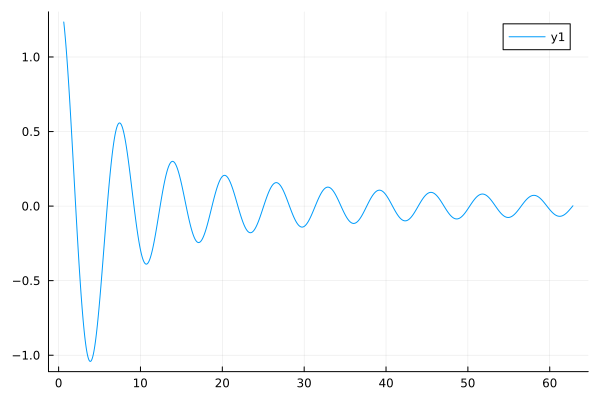

In [31]:
plot(ks, analytic_zz_integral)

In [36]:
numerical_zz_integral = numerical_T_ii[:, 4] |> real

1000-element Vector{Float64}:
  1.2346558318553804
  1.2020214502724063
  1.1666767204760515
  1.128718907321247
  1.0882523556629493
  1.0453881773015845
  1.0002439178740132
  0.9529432047425266
  0.9036153769926337
  0.8523950987071396
  ⋮
 -0.03251375248933362
 -0.028448576688123266
 -0.0242803977630726
 -0.020025504361335753
 -0.015700492091696838
 -0.011322198926323628
 -0.006907639777719667
 -0.002473940504589908
  0.0019617283979233213

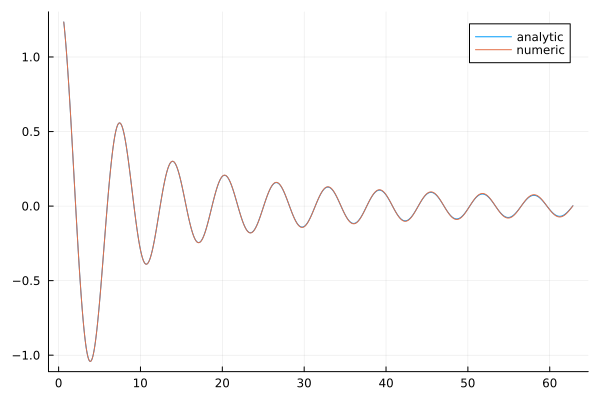

In [37]:
plot(ks, analytic_zz_integral, label="analytic")
plot!(ks, numerical_zz_integral, label="numeric")

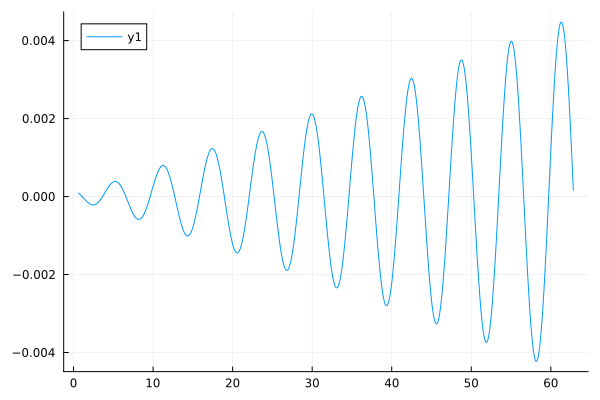

In [38]:
plot(ks, (analytic_zz_integral - numerical_zz_integral))